## Observations and Insights

## Dependencies and starter code

In [251]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [252]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [253]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [254]:
# merged & created 'base_data' DataFrame to handle merged content
base_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
base_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [255]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data = base_data[['Drug Regimen','Tumor Volume (mm3)']]
tumor_stats = tumor_data.groupby(['Drug Regimen']).count()
tumor_stats = tumor_stats.rename(columns={"Tumor Volume (mm3)":"Count"})
tumor_stats['Mean'] = tumor_data.groupby(['Drug Regimen']).mean()
tumor_stats['Median'] = tumor_data.groupby(['Drug Regimen']).median()
tumor_stats['Variance'] = tumor_data.groupby(['Drug Regimen']).var()
tumor_stats['Standard Dev.'] = tumor_data.groupby(['Drug Regimen']).std()
tumor_stats['SEM'] = tumor_data.groupby(['Drug Regimen']).sem()
tumor_stats

,Count,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

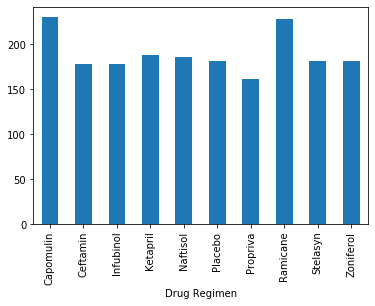

In [256]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pan_bar = tumor_stats['Count'].plot(kind="bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

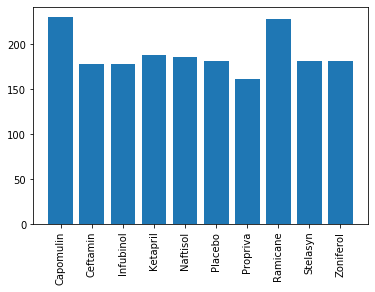

In [257]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = tumor_stats.index
y_axis = tumor_stats['Count']
py_bar = plt.bar(x_axis, y_axis)
plt.xticks(rotation='vertical')

## Pie plots

In [258]:
no_sex_dups = base_data.drop_duplicates(subset='Mouse ID',keep='first')
sex_of_mice = pd.DataFrame(no_sex_dups['Sex'].value_counts())
sex_of_mice

,Sex
Male,125
Female,124


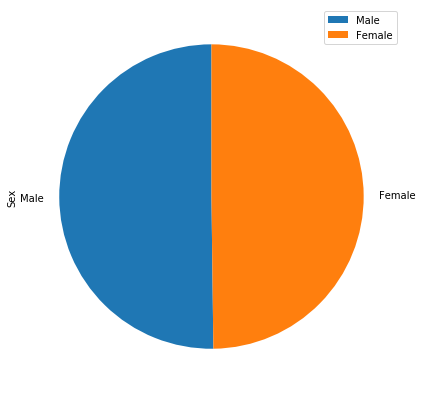

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pan_sex_dist = sex_of_mice.plot.pie(y='Sex',startangle=90,figsize=(7,7))

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


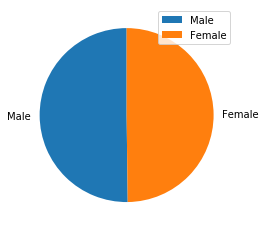

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_sex_dist = plt.pie(sex_of_mice,labels=sex_of_mice.index,startangle=90)
plt.legend()

## Quartiles, outliers and boxplots

In [261]:
tumor_stats.sort_values('Mean',ascending=True)

,Count,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


In [262]:
# 4 most promising Drug Regimens (by lowest mean) are Ramicane, Capomulin, Propriva, Ceftamin
top_drugs = ["Ramicane", "Capomulin", "Propriva", "Ceftamin"]
promise_df = base_data.loc[base_data['Drug Regimen'].isin(top_drugs)]
final_vol = promise_df.loc[promise_df['Timepoint']==45]
final_vol.head(15)
# below is final tumor data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [263]:
ramicane_data = promise_df.loc[promise_df['Drug Regimen']=="Ramicane"]
capomulin_data = promise_df.loc[promise_df['Drug Regimen']=="Capomulin"]
propriva_data = promise_df.loc[promise_df['Drug Regimen']=="Propriva"]
ceftamin_data = promise_df.loc[promise_df['Drug Regimen']=="Ceftamin"]

In [264]:
ramicane_quar = ramicane_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_quar = capomulin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
propriva_quar = propriva_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_quar = ceftamin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])

In [265]:
def iqr_calc(obj,obj2):
    lowerq = obj[0.25]
    upperq = obj[0.75]
    iqr = upperq - lowerq
    upper_bound = upperq + (iqr*1.5)
    lower_bound = lowerq - (iqr*1.5)
    upper_outliers = obj2.loc[obj2['Tumor Volume (mm3)'] > upper_bound]
    lower_outliers = obj2.loc[obj2['Tumor Volume (mm3)'] < lower_bound]
    total_outliers = upper_outliers["Tumor Volume (mm3)"].count() + lower_outliers["Tumor Volume (mm3)"].count()
    print(f"IQR: {round(iqr,2)}")
    print(f"Potential outliers: {total_outliers}")
    

In [266]:
# Ramicane data
iqr_calc(ramicane_quar,ramicane_data)

IQR: 8.33
Potential outliers: 1


In [267]:
# Capomulin data
iqr_calc(capomulin_quar,capomulin_data)

IQR: 7.31
Potential outliers: 2


In [268]:
# Propriva data
iqr_calc(propriva_quar,propriva_data)

IQR: 9.1
Potential outliers: 4


In [269]:
# Ceftamin data
iqr_calc(ceftamin_quar,ceftamin_data)

IQR: 9.59
Potential outliers: 0


In [270]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# see above for answers


In [271]:
ramicane_data = promise_df.loc[promise_df['Drug Regimen']=="Ramicane"]
capomulin_data = promise_df.loc[promise_df['Drug Regimen']=="Capomulin"]
propriva_data = promise_df.loc[promise_df['Drug Regimen']=="Propriva"]
ceftamin_data = promise_df.loc[promise_df['Drug Regimen']=="Ceftamin"]

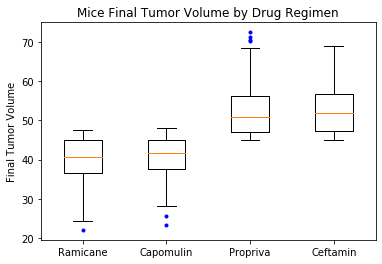

In [309]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Mice Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
plot_data = [ramicane_data['Tumor Volume (mm3)'],capomulin_data['Tumor Volume (mm3)'],propriva_data['Tumor Volume (mm3)'],ceftamin_data['Tumor Volume (mm3)']]
ax1.boxplot(plot_data,labels=top_drugs,sym='b.')
#added color
plt.show()

## Line and scatter plots

In [273]:
capo_data_all = base_data.loc[base_data['Drug Regimen'] == 'Capomulin']
# taking one mouse
capo_data_s185 = capo_data_all.loc[capo_data_all['Mouse ID'] == 's185']
lin_x_axis = capo_data_s185['Timepoint']
lin_y_axis = capo_data_s185['Tumor Volume (mm3)']
capo_data_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 1.0, 'Tumor Volume For Mouse s185 Taking Capomulin')

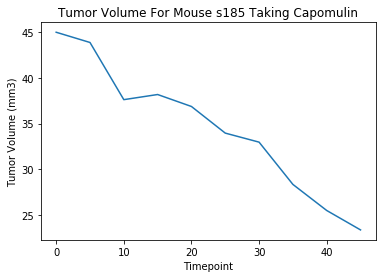

In [274]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(lin_x_axis,lin_y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume For Mouse s185 Taking Capomulin")

In [275]:
mouse_weights = capo_data_all.groupby('Weight (g)').mean()
mouse_weights.head()

,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Weight (g),,,,
15,16.000000,22.500000,36.182040,0.000000
17,14.769231,21.538462,37.214133,1.030769
19,7.666667,22.500000,41.182391,0.700000
20,23.000000,22.500000,39.141053,0.600000
21,17.458333,21.666667,42.088700,0.625000


The correlation coefficient is: 0.9505
The line equation is: y = 0.89x + 22.76


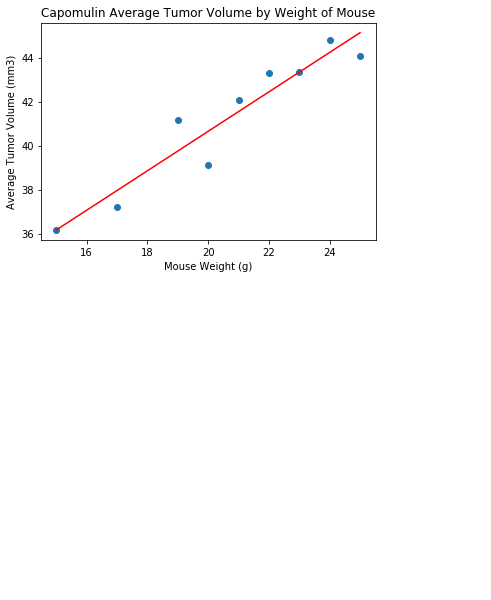

In [312]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(mouse_weights.index, mouse_weights['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume by Weight of Mouse")

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weights.index
y_values = mouse_weights['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=30,color="red")
print(f"The correlation coefficient is: {round(rvalue,4)}")
print(f"The line equation is: {line_eq}")
plt.show()

In [314]:
obsv_data = base_data.groupby('Drug Regimen').mean()
obsv_data

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [ ]:
# 3 observations:

# 1) Assuming the placebo is just that, it appears some drugs, like Ketapril, Naftisol, and Stelasyn, could actually promote the growth of the tumor. 
# This may be just due to the sample, and cannot be considered a firm conclusion. 

# 2) The average tumor volume is tightly correlated with mouse weight, meaning larger mice are more likely to get larger tumors

# 3) Propriva could be a riskier drug, or should require more testing to null the effects of the sample chosen, as it had some high outliers. 